In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import inventorize3 as inv

Read the data

In [6]:
retail_data = pd.read_csv("online_retail2.csv")
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Calculating Revenue

In [7]:
retail_data["Revenue"] = retail_data["Price"]*retail_data["Quantity"]
retail_data = retail_data[retail_data.Quantity > 0]

In [8]:
grouped_retail_data = retail_data.groupby("Description").agg(total_sales = ("Quantity",np.sum), total_revenue = ("Revenue", np.sum)).reset_index()

In [9]:
grouped_retail_data

,Description,total_sales,total_revenue
0,3 STRIPEY MICE FELTCRAFT,136,248.25
1,ANIMAL STICKERS,24,5.04
2,BLACK PIRATE TREASURE CHEST,23,45.07
3,BROWN PIRATE TREASURE CHEST,20,47.24
4,CAMPHOR WOOD PORTOBELLO MUSHROOM,2,3.82
...,...,...,...
2183,ZINC HEART LATTICE 2 WALL PLANTER,1,13.00
2184,ZINC HEART LATTICE CHARGER LARGE,5,22.78
2185,ZINC METAL HEART DECORATION,486,575.70
2186,ZINC POLICE BOX LANTERN,2,22.52


In [10]:
a = inv.ABC(grouped_retail_data[["Description", "total_sales"]])

In [11]:
a.columns

Index(['Description', 'total_sales', 'Percentage', 'comulative', 'Category'], dtype='object')

In [12]:
a.Category.value_counts()

C    1204
B     571
A     413
Name: Category, dtype: int64

Visualizing the ABC segmentation

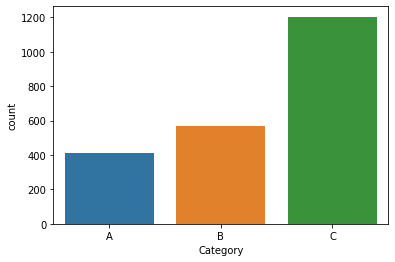

In [13]:
#Visualizing the number of skus contributing to the total_sales
sns.countplot(x = 'Category', data = a)

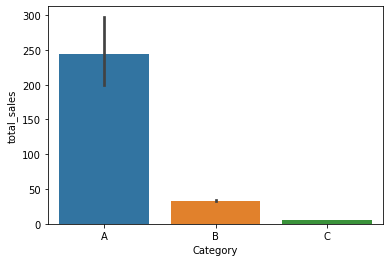

In [14]:
#Visualizing the total_sales in each category
sns.barplot(x = "Category", y = "total_sales", data = a)

Multi criteria ABC analysis

In [15]:
b = inv.productmix(grouped_retail_data["Description"], grouped_retail_data["total_sales"], grouped_retail_data["total_revenue"])

In [16]:
b.columns

Index(['skus', 'sales', 'revenue', 'sales_mix', 'comulative_sales',
       'revenue_mix', 'comulative_revenue', 'sales_category',
       'revenue_category', 'product_mix'],
      dtype='object')

In [17]:
b.product_mix.value_counts()

C_C    924
A_A    301
B_B    292
C_B    252
B_A    176
B_C    103
A_B    100
C_A     28
A_C     12
Name: product_mix, dtype: int64

Visualizing the Multi Criteria ABC segmentation

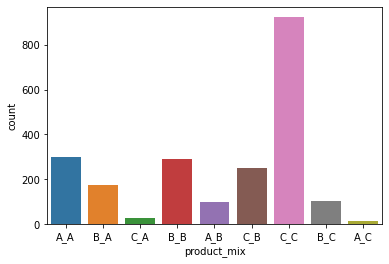

In [18]:
#Visualizing the number of skus contributing each of the categories
sns.countplot(x = 'product_mix', data = b)

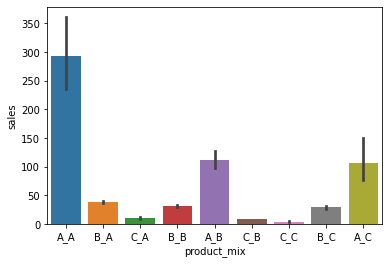

In [19]:
#Visualizing the total_sales in each category
sns.barplot(x = "product_mix", y = "sales", data = b)

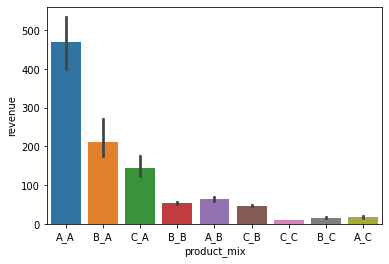

In [20]:
sns.barplot(x = "product_mix", y = "revenue", data = b)

Multi-criteria ABC analysis at store or department level

In [21]:
grouped_retail_by_Country = retail_data.groupby(["Country", "Description"]).agg(total_sales = ("Quantity",np.sum), total_revenue = ("Revenue", np.sum)).reset_index()

In [22]:
grouped_retail_by_Country.head()

,Country,Description,total_sales,total_revenue
0,Australia,ANTIQUE SILVER TEA GLASS ETCHED,12,15.0
1,Australia,CREAM FELT EASTER EGG BASKET,6,9.9
2,Australia,HANGING HEART ZINC T-LIGHT HOLDER,24,20.4
3,Australia,PAPER BUNTING RETRO SPOTS,12,35.4
4,Australia,PAPER BUNTING WHITE LACE,12,35.4


In [23]:
mix_country = inv.productmix_storelevel(grouped_retail_by_Country["Description"], grouped_retail_by_Country["total_sales"], grouped_retail_by_Country["total_revenue"], grouped_retail_by_Country["Country"])

/usr/local/lib/python3.8/dist-packages/inventorize3/__init__.py:1102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['sales_mix']= store['sales']/sum(store['sales'])


In [24]:
mix_country.columns

Index(['sku', 'sales', 'revenue', 'storeofsku', 'sales_mix',
       'comulative_sales', 'revenue_mix', 'comulative_revenue',
       'sales_category', 'revenue_category', 'product_mix'],
      dtype='object')

In [25]:
product_mix = mix_country.groupby(["storeofsku", "product_mix"]).count().reset_index().iloc[:, :3]

In [26]:
product_mix[product_mix["storeofsku"] == "Australia"]

,storeofsku,product_mix,sku
0,Australia,A_A,4
1,Australia,A_B,1
2,Australia,B_B,1
3,Australia,B_C,1
4,Australia,C_A,1
5,Australia,C_B,1
